# BEE313 Problem 4.1

Problem 4.1: Over a 7-hour period during which there was a rain event at a small stream in the Cascade mountains, both flow rates and the hydrologic tracer of the deuterium to hydrogen (δD) isotope ratio were measured. The flow rate was

q = [0.02, 0.06, 0.12, 0.08, 0.04, 0.03, 0.02]

in cubic meters per second for each of the 7 hours. The δD isotope values were measured as

δD = [-11, -6, -5, -8, -9, -10, -11]

in permil. Note: isotope ratios in permil can be treated as concentrations for the context of this problem. Rain begin during the second hour and had an average isotope value of δD = -4 permil. Estimate the total volume of water in the stream during this period that originated from rainfall from this storm?

 

### 4.1 Thought Process

> Although it says "over a 7 hour period" it is important to recognize that the rain event began during the second hour!

> Goal is to estimate the total volume of water in the stream during this period that originated from rainall from this storm

> The volume of channel precipitation, Pcp
   * approximated the hydrographj of runoff from channel precipiation to be a triangle...

Pcp = .5 * qpkc * (Tp+Tcm)

qpck is at Tp... Total time - Tp = Tc

Tp = 5 hours.... 2 to 7 


> OR OTHER METHOD...

Gives a fraction of water coming from rain event at peak flow..

q*/q(t) = (c(t) - Cb)/ (Cevent - Cbase)

> Now taking the above equation translate to total volume...

cb -> unsure... maybe 0
Cevemt  =  -4... the concentration during the rain event
q* -> unknown flow that we will sum
q(t) -> known list of flowrates...





In [5]:
# Import statements
import numpy as np


#sum(q*) = q(t)*((c(t) - Cb)/ (Cevent - Cbase))
### Not sure if the above equation is correct... still not entirely sure about the Cbase and Cevent and I am think that in the case of this...
###### C(t) -> 

q = np.array([0.02*60*60, 0.06*60*60, 0.12*60*60, 0.08*60*60, 0.04*60*60, 0.03*60*60, 0.02*60*60]) # converted such that it is the amount of water that has fell within an hour
# assumed the c_t is all concentrations
c_t = np.array([-11, -6, -5, -8, -9, -10, -11])
# assumed Cevent is only concentrations from 2 hours and on
Cevent=-4
# assumed that Cbase was -11, baseflow occurance
Cbase = -11

### GUESSS...
##### took the concnetation and subtracted from base value then summed to create a fraction of sorts...
##### then I multiplied that by q..
##### Then I summed the array
##### This generated a value for total volume of water in the stream during this period that originated from rainfall from this storm
q_star = q*(((c_t - Cbase))/((Cevent - Cbase)))
print(q_star)
vol = np.sum(q_star)
print(f'total volume of water in the stream during this period that originated from rainfall from this storm: {vol:.3f} m^3')

[  0.         154.28571429 370.28571429 123.42857143  41.14285714
  15.42857143   0.        ]
total volume of water in the stream during this period that originated from rainfall from this storm: 704.571 m^3


# BEE313 Problem 4.2

Problem 4.2: A local watershed consists of 4 square kilometers of good pasture and 6 square kilometers of fair woodlands and is drained by a 8km stream with a 6% slope. If the soils in this area are sandy loams and of average wetness, estimate what will be the peak flow in response to a 85mm storm that lasts 2.5 hours.



| Landcover           |            Soil        |  Area (sq mi) |  Fraction of Total area | Condition II Curve number |
|---------------------|------------------------|---------------|-------------------------|---------------------------|
| good  pasture       |  Sandy Loam (Group B)  |        4      |          .4             |             61            |
| fair woodlands      |  Sandy Loam (Group B)  |        6      |          .6             |             60            |

Curve numbers were found in table 10.11 of the Physical Hydrology Textbook...



Watt and Chow formula was used... to compute time of concentration
Tc = .128*((L/((S_c)^.5))^.47)
* Sc =  sine of channel slope angle (unitless)
* L = length of main stream (km)
* Tc = time of conentration (hr)

For time of rise 
Tr = (0.5*TP_star) + (0.6*Tc)
* TP_star = the duration of excess rainfall (hr)
* Tc = time of concentration estimated from Watt and Chow (hr)

Peak Flow Equation:

qpk = (.208*P_star*A)/(Tr)
* A = total area (km^2)
* qpk = peak flow (m^3/s)
* P_star = effective rainfall (mm)
* Tr = time of rise (hr)


In [45]:
# Objective: Find the peak flow with respect to the storm

# stream characteristics
### sine of channel slope angle
S_c = .06 # percentage 6%
### stream length
L = 8 # km

#storm
### total rainfall (P)
P = 85 #mm
### duration of the even
TP_star = 2.5 #hours

# average wetness of soil...

# areas
past_area = 4 # km
wood_area = 6 #km
### Total Area
A = 10

frac_past = past_area/A
frac_wood = wood_area/A

# Curve #
CN_past = 61
CN_wood = 60

# Step 1: Compute the weighted average curve number
CN_weight = (CN_past*frac_past) + (CN_wood*frac_wood)


# Step 2: Determine Smax...
### Smax is the watershed storage capacity that incorporates all watershed storage... including the interception, surface and subsurface storage. 
Smax = (25400/CN_weight)-254

# Step 3: Determine the effective rainfall
P_star = ((P-(.2*Smax))**2)/(P+(.8*Smax))


print(" "*3)
# Step 4: Estimate teh Concentration Time
## Watt and Chow formula was used...
Tc = .128*((L/((S_c)**.5))**.79)

# Step 5: Calculated the time to rise
Tr = (0.5*TP_star) + (0.6*Tc)

# Step 6: Calculated the Peak Flow 
qpk = (.208*P_star*A)/(Tr)
print(f'Peak Flow with respect to the 85mm storm event {qpk:.3f} m^3/s')

## Comparision of precipiration values from prior problem and this one.. mm/hr
event_text = 107/3.4
event_p2 = P/TP_star
print(event_text)
print(event_p2)

   
Peak Flow with respect to the 85mm storm event 10.370 m^3/s
31.47058823529412
34.0


# BEE313 Problem 4.3

Problem 4.3: Based on an extensive time series of rainfall-runoff data, a small catchment has the following half hour storm unit hydrograph (defined where 1unit corresponds to 1cm of effective precipitation): at t=1hr, q*=3.5m3/sec, at t=2hr, q*=17.5m3/sec, att=3hr, q*=8.75m3/sec, at t=4hr, q*=5.25m3/sec, at t=5hr, q*=3.25m3/sec, and at t=6hr, q*=1.5 m3/sec, where t is the time after the storm begins and q* is the event flow for that hour. If 1.5 cm of effective precipitation falls during a half-hour storm that starts at 8:00AM and 2.5 cm of effective precipitation falls during a half-hour storm that starts at 10:00AM, what is the expected peak flow out of this catchment and when does it occur?

 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 0.     3.75  26.25  21.875 51.625 26.75  15.375  8.125  3.75 ]
Peak Outflow: 51.625 m^3/s
Peak Outflow Time: 4 hours


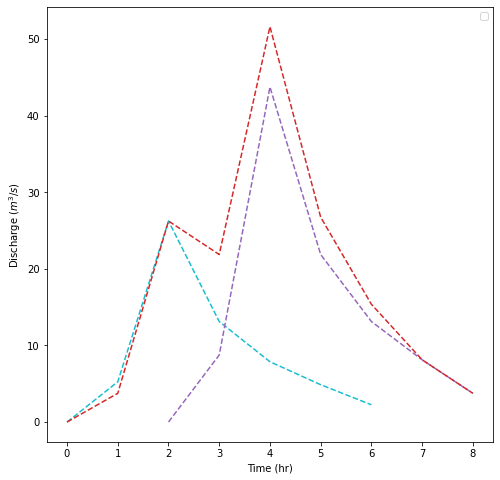

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
# based on a storm unit hydrograph


### t is time after storm begins....

# Generate the two arrays for half hour storm unit hydrograph...
##### 1 unit = 1 cm of effective precip
## q* is the eventflow for that hour..
q_star = np.array([0,3.5, 17.5, 8.75, 5.25, 3.25, 1.5])
## time after storm begins
t = np.array([0,1,2,3,4,5,6])

p_star1_5 = 1.5 # cm
p_star2_5 = 2.5 # cm

# Based on above hydrograph...
## If 1.5 cm of effective precip fall during a half hour storm that starts at 8am 
## and 2.5 cn of effective precip falls during a half hour storm event that starts at 10am...

## Baseically what will be done is the preipication will be multiplied by the qstar
### And then it will be determined when the expected peak flow out of catchment is and when it occurs

fig=plt.figure()
fig.set_size_inches(8,8,8)

# Step 1: Find inital peak flow...
ax3 = fig.add_subplot(111)
# ## found max value in this array...
# init_max_index = np.where(q_star == np.max(q_star))[0][0]
# tinit_max = t[init_max_index]
# q_starinit_max =q_star[init_max_index]

# ax3.plot(t, q_star, '--', color='tab:red')
# ax3.plot(tinit_max, q_starinit_max,'b.', markersize = 12, label = "peak discharge initial")

# Step 2: Find the response hydrograph for effective rainfall of 1.5 cm. 
# ## Found the peak flow for this...
time_8 = 8 # am
q_star2 = q_star*p_star1_5

## found max value in this array...
#init_max_index2 = np.where(q_star2 == np.max(q_star2))[0][0]
#tinit2_max = t[init_max_index2]
#q_star2init_max =q_star2[init_max_index2]

ax3.plot(t, q_star2, '--', color= 'tab:cyan')
#ax3.plot(tinit2_max, q_star2init_max,'m.', markersize = 12, label = "peak discharge at 1.5cm")


# Step 3: Find the response hydrograph for effective rainfall of 2.5 cm. 
# ## Found the peak flow for this...
time_10 = 10 # am ...
q_star3 = q_star*p_star2_5
t_10 = t+2
### HOWEVER IF 8am is set to be time at 1... then 10am is set to be time at 3 so from 
## found max value in this array...
# init_max_index3 = np.where(q_star3 == np.max(q_star3))[0][0]
# tinit3_max = t[init_max_index3]
# q_star3init_max =q_star3[init_max_index2]

ax3.plot(t_10, q_star3, '--', color= 'tab:purple')
#ax3.plot(tinit3_max, q_star3init_max,'g.', markersize = 12, label = "peak discharge at 2.5cm")


# Step 4: Added the two arrays together to generate a plot for the total flow
t_total = np.arange(0,9)
q_total = np.empty(len(t_total))
for t in t_total:
    # Event for 8am starts here but hasn't been an hour yet so flow is 0
    if t==0:
        q_total[t]=0
    # At t = 1 there is going to be 9am, only first rain event...
    # From t =2 this is 10am when next event starts... but still hasn't had 1 hour of rain for the 2.5cm event\
    ## account for this by adding the zero flow rate..
    elif t>1  and t<=2:
        q_total[t]=q_star2[t]+q_star3[t-2]
    # Now from t = 3 to t = 6 both events will be happening
    ## Decreasin q_star 3 by 2 to get the proper points after zero flow...
    elif t>=3 and t<=6:
        q_total[t] = q_star2[t] + q_star3[t-2]
    else:
        q_total[t]=q_star3[t-2]
print(q_total)

ax3.plot(t_total, q_total, '--', color= 'tab:red', label = "")


# Step 5: Compared Peak flows and their times... to determine peak flow and at what time
# Found the max flow rate..
init_max_index = np.where(q_total == np.max(q_total))[0][0]
# Associated the max flow rate index to the time...
t_max = t_total[init_max_index]
# Flow Rate Associated with this poiint in time...
q_max =q_total[init_max_index]

print(f'Peak Outflow: {q_max} m^3/s')
print(f'Peak Outflow Time: {t_max} hours')
## got the proper time
# pk_time = time(time_10+tinit3_max)
# print(f'Time of Peak Outflow: {pk_time} pm')

##relevant axes and legend
ax3.legend()
ax3.set_xlabel('Time (hr)')
ax3.set_ylabel('Discharge ($m^3/s$)')
plt.show()

#Lagging...
### Hydographs occur at diff start times...

### Water coming out of catchment from first storm...
### Total peak flow associated from the two storms...

# Add final curve on top to combine


## 

# BEE313 Problem 4.4

Problem 4.4: A storm with the unit hydrograph from problem 4.3 and 1cm in depth will be routed through a six-kilometer reach with a slope of 2.5 percent. If the depth of the water is 1.5m on average and the Mannings coefficient for this reach is 0.05, what will be the peak flow out of this reach and when will it occur?

0.26814105751873846
1.1621090599481485
Peak Flow out of Reach 16.283 m^3/s


Time of Peak Flow out of Reach 2.181 hr




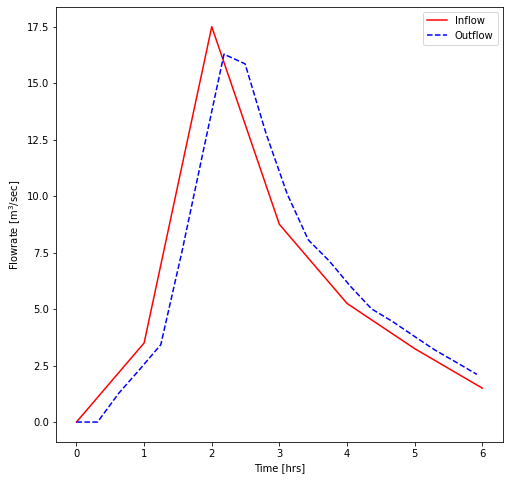

In [72]:
# WHAT WILL BE PEAK FLOW OUT OF REACH AND WHEN WILL IT COME!!!
import numpy as np
# knowns

## Storm
p_star = 1 #cm

## Hydrograph
## q* is the eventflow for that hour..
q_star = p_star*(np.array([0,3.5, 17.5, 8.75, 5.25, 3.25, 1.5])) # m^3/s
## time after storm begins
t = np.array([0,1,2,3,4,5,6])

## Reach Characteristics
#### Length (X) m
X = 6*1000 # m
#### Depth of discharge
y = 1.5  #m
#### slope
s = .025 # %
#### Mannings coefficient
n_M = .05
# unit conversion factor
epsilon = 1 # m^(1/3)
# Tp
Tp = .5
# Step 1: determine flow velocity:
u = (epsilon/n_M)*(y**(2/3))*(s**(1/2))
#print(f"flow velocity {u:.3f} m/s")

# Step 2: determine the flood wave velocity
U_flood = 1.5*u
#print(f"flood wave velocity {U_flood:.3f} m/s")

# Step 3: Determine travel time for the reach... T_star
T_star = (X/U_flood)/3600 # hours
print(T_star)
#print(f"Travel Time for the reach {T_star:.3f} hr")
# Step 4: Estimate teh Concentration Time
## Watt and Chow formula was used...
Tc = .128*(((X/1000)/((s)**.5))**.79)
# Step 5: Calculated the time to rise
Tr = (0.5*Tp) + (0.6*Tc)
#print(f"Travel Time for rise {Tr:.3f} hr")
# Step 6: routing time step
### Δt must be less than T* and less than 1/5 the time of rise
### of the inflow hydrograph
##### Time for rise is .558, and time for travel is .268
####### Subtracted .01 to get
fifth_tr = ((1/5)*(Tr))-.01
#print(fifth_tr)
###### fifth_tr is less than T_star... so use this value as time step...

### Timestep...
delta_t = fifth_tr
# Step 7: Compute Routing Coefficient:
CX = delta_t/T_star
print(CX)
#print(f'Routing Coefficient {CX:.3f} hr')

# Step 8: STUCK HERE......
#### Using interpolation to find the points between points...
### Apply the equation 10.56.. to determing outflow hydrograph
# interpolate to a fine timescale
timeFine = np.arange(0, 6, delta_t)
qInFine = np.interp(timeFine, t,q_star)

qOutFine = qInFine*0

# Translate the flow down the reach in time.
for i in np.arange(0,len(timeFine)-1):
    qOutFine[i+1] = CX*qInFine[i] + (1-CX)*qOutFine[i]

# peak outflow
pk_flow_idx = np.where(qOutFine==np.max(qOutFine))[0][0]
time_pk = timeFine[pk_flow_idx]
pkflow_rch = qOutFine[pk_flow_idx]
print(f'Peak Flow out of Reach {pkflow_rch:.3f} m^3/s')
print("\n")
print(f'Time of Peak Flow out of Reach {time_pk:.3f} hr')
print("\n")
fig=plt.figure()
fig.set_size_inches(8,8,8)
ax4 = fig.add_subplot(111)
ax4.plot(t,q_star,'r-',label='Inflow')
ax4.plot(timeFine,qOutFine,'b--',label='Outflow')
ax4.set_xlabel('Time [hrs]')
ax4.set_ylabel('Flowrate [m$^3$/sec]')
ax4.legend()
plt.show()

## Flow 0 at t=0

Peak flow will occur 2.33 hours into the event..
